In [86]:
from google_play_scraper import app
from pandas import *
import numpy as np
import string
import re
from gensim.parsing.preprocessing import remove_stopwords
from nltk.tokenize import word_tokenize
from num2words import num2words
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords  #stopwords
from nltk.stem import WordNetLemmatizer  
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
from gensim.corpora import Dictionary
from tqdm import tqdm
from time import time
from scipy.sparse import csr_matrix
from gensim.models import LdaMulticore
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
import re, nltk, spacy, gensim
# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

# To create plots
import matplotlib.pyplot as plt
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis

import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Anika\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Anika\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Task 1: GATHERING REVIEWS

In [35]:
# from google_play_scraper import Sort, reviews_all


# us_reviews = reviews_all(
#     'com.bodybuilding.rise',
#     sleep_milliseconds=0, # defaults to 0
#     lang='en', # defaults to 'en'
#     sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
# )


# df_busu = pd.DataFrame(np.array(us_reviews),columns=['review'])
# df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))
# df_busu.head()

# df_busu.to_csv("com.bodybuilding.rise.csv")

### Task 2: PREPROCESSING TEXT

In [36]:
#Pre processing code snippet for the first app
#File names are changed and each app's reviews are preprocessed and stored in csv files

data_app1 = read_csv("com.bodybuilding.rise.csv")
app1_reviews = data_app1['Review'].tolist()

#steps to be followed
removed_punctuation = []
removed_special_ch = []
num2words_array = []
removed_spaces = []
lowercase_array = []
removed_stopwords = []
after_lemmatiation = []

def removepunctuations(review_list):
    
    result_arr = [] 
    for element in review_list:
        
        result = element.translate(str.maketrans('', '', string.punctuation))
        result_arr.append(result)
       
    return result_arr

In [37]:
removed_punctuation = removepunctuations(app1_reviews)

In [38]:
def removespecialcharacters(review_list):
    pattern = r'[^A-Za-z0-9 ]+'
    
    result_arr = []
    for element in review_list:
        
        result = re.sub(pattern, ' ', element)
        result_arr.append(result)
           
    return result_arr

In [39]:
removed_special_ch = removespecialcharacters(removed_punctuation)

In [40]:
def numberstotext(review_list):
    
    result_arr = []
    for element in review_list:
      
        result = re.sub('\d+',  lambda m: num2words(m.group()), element)
        result_arr.append(result)
        
    return result_arr

In [41]:
num2words_array = numberstotext(removed_special_ch)

In [42]:
def removeextraspaces(reviews_list):
    
    result_arr = []
    for element in reviews_list:
        
        result = re.sub(' +',  ' ', element)
        result_arr.append(result)     
    
    return result_arr

In [43]:
removed_spaces =  removeextraspaces(num2words_array)

In [44]:
def tolowercase(review_list):
   
    result_arr = []
    for element in review_list:
        
        result = element.lower()
        result_arr.append(result)       
    
    return result_arr

In [45]:
lowercase_array = tolowercase(removed_spaces)

In [46]:
def removestopwords(review_list):
 
    result_arr = []
    for element in review_list:
      
        result = remove_stopwords(element)
        result_arr.append(result)
        
    return result_arr    

In [47]:
removed_stopwords = removestopwords(lowercase_array)

In [48]:
# Only lemmatization and no stemming
from nltk.stem import WordNetLemmatizer

def  lemmatization(review_list):
       
    lemmatizer = WordNetLemmatizer()
    result_arr = []
    for element in review_list:
        words = word_tokenize(element)
       
        lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in words])
        result_arr.append(lemmatized_output)
         
    return result_arr

after_lemmatiation =  lemmatization(removed_stopwords)

In [49]:
# SAMPLE OF 15 REVIEWS
sample_list = after_lemmatiation[:15] 

counter = 0;
for sample in sample_list:
    counter += 1;
    print("\n");
    print("App Review Sample " + str(counter));
    print(sample);  



App Review Sample 1
read review purchasing app working fine week tried logging today account ready app dont care


App Review Sample 2
app updated year


App Review Sample 3
paid year subscription havent able sign day


App Review Sample 4
like plan new power lifting access plan online login account truly hope short lived issued


App Review Sample 5
great app work got gym wasnt able open threerd time happened free big deal ive paying monthly year issue keep happening


App Review Sample 6
unable sign giving network error


App Review Sample 7
multiple day time customer service hang randomly email day turnaround waste money honest


App Review Sample 8
bummer app great way network issue fan paying service use


App Review Sample 9
working look app doesnt sign


App Review Sample 10
good application easy navigate exercise option case proper machine weight isnt available im disappointed far month issue like application logging guess update recently bug like taking long time open major


In [50]:
#Writing preprocessed reviews to an intermediate file
predescriptionfile = {
    'Package name': data_app1['Package name'].tolist(),
    'Reviewer name' : data_app1['Reviewer name'].tolist(),
    'Rating':data_app1['Rating'].tolist()
          }

df = DataFrame(predescriptionfile, columns=['Package name' ,'Reviewer name' ,'Rating'])

df['Review'] = after_lemmatiation
df.to_csv("PreProcessedReview_com.bodybuilding.rise.csv")

##### BONUS of TASK 2 

The default list of stop words in English contains common words that appear in almost every document. Depending on the topic and the context of the NLP, several more words in addition to the general English stopwords can become irrelevant. For example while analysing NLP within the context of health related apps, all my user reviews, fetures contained words like "health", "fit", "body" to name a few. As a result, documents aren't distinguishing. The words do not contribute to the analysis, rather they negatively affect the NLP analysis i.e LDA models, sentiments analysis (polarity). Words like these may also create a false postive of similarity. 

When these stop words are not filtered from user reviews, they create noise and relevant key words which could potentially help in software requirements elicitation can get lost in the noise. For example, when creating LDA topics, the topics may not be distint enough because there are too many common words - which should be removed using a customized stop-word list.  

### Task 3: SENTIMENT ANALYSIS

In [123]:
#SENTIMENT ANALYSIS USING TEXTBLOB

package_arr = {"com.bodybuilding.rise", "com.fitbod.fitbod", "com.hevy", "com.lesmillsondemand",
               "com.openreply.pam","com.strongware.stronglogs", "com.welzen.fasten", "de.wger.flutter", 
               "gymworkout.gym.gymlog.gymtrainer", "io.strongapp.strong", "com.fitness22.workout"}

display_df = DataFrame({'Package name':[],'Review':[],'Polarity':[]})
for app in package_arr:
    
    data_preprocessed = read_csv("PreProcessedReview_"+app+".csv")
    reviews_initial = data_preprocessed['Review'].tolist()
    reviews_polarity = []

    for review in reviews_initial:
        res = TextBlob(str(review))
        polarity = res.sentiment.polarity
        reviews_polarity.append(polarity)
    
    sa = {
        'Package name': data_preprocessed['Package name'].tolist(),
        'Review' : data_preprocessed['Review'].tolist()
    }

    df = DataFrame(sa, columns=['Package name' ,'Review' ,'Polarity'])

    df['Polarity'] = reviews_polarity
    set_option('display.max_rows', df.shape[0]+1)

    #writing Textblob SA for EACH app in separate csv file
    df.to_csv("Textblob_"+app+".csv")
    
    #For displaying the sample dataframe, we take 24 SAMPLES FROM EACH APP
    df.columns = display_df.columns
    display_df = concat([df.head(30), display_df], ignore_index=True)

set_option('display.max_rows', None)   
display(display_df)

,Package name,Review,Polarity
0,com.welzen.fasten,android got woops tried create account disappo...,-0.600000
1,com.welzen.fasten,happened changed server log anymore,0.000000
2,com.welzen.fasten,keep coming whoop error occurred try,0.000000
3,com.welzen.fasten,register im android,0.000000
4,com.welzen.fasten,great app technical issue people having rate p...,0.051667
5,com.welzen.fasten,app good request additional feature auto calcu...,0.700000
6,com.welzen.fasten,need updating potentially best fasting app day...,0.750000
7,com.welzen.fasten,tech issue stopped experience start,0.000000
8,com.welzen.fasten,paid logged access premium feature getting who...,-0.875000
9,com.welzen.fasten,tried day trail payment setup thirteen use pre...,0.000000


In [124]:
#SENTIMENT ANALYSIS USING VADER

display_df2 = DataFrame({'Package name':[],'Review':[],'Polarity':[]})
for app in package_arr:
    
    data_preprocessed = read_csv("PreProcessedReview_"+app+".csv")
    reviews_initial = data_preprocessed['Review'].tolist()
    
    sid_obj= SentimentIntensityAnalyzer()
    reviews_polarity_vader = []

    for review in reviews_initial:
        polarity = sid_obj.polarity_scores(str(review))
        reviews_polarity_vader.append(polarity)
    
    sa2 = {
        'Package name': data_preprocessed['Package name'].tolist(),
        'Review' : data_preprocessed['Review'].tolist()
    }

    df2 = DataFrame(sa2, columns=['Package name' ,'Review' ,'Polarity'])

    df2['Polarity'] = reviews_polarity_vader
    set_option('display.max_rows', df2.shape[0]+1)

    #writing Textblob SA for EACH app in separate csv file
    df2.to_csv("Vader_"+app+".csv")
    
    #For displaying the sample dataframe, we take 24 SAMPLES FROM EACH APP
    df2.columns = display_df2.columns
    display_df2 = concat([df2.head(30), display_df2], ignore_index=True)
    
set_option('display.max_rows', None)
display(display_df2)

,Package name,Review,Polarity
0,com.welzen.fasten,android got woops tried create account disappo...,"{'neg': 0.311, 'neu': 0.485, 'pos': 0.204, 'co..."
1,com.welzen.fasten,happened changed server log anymore,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,com.welzen.fasten,keep coming whoop error occurred try,"{'neg': 0.351, 'neu': 0.649, 'pos': 0.0, 'comp..."
3,com.welzen.fasten,register im android,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,com.welzen.fasten,great app technical issue people having rate p...,"{'neg': 0.11, 'neu': 0.61, 'pos': 0.28, 'compo..."
5,com.welzen.fasten,app good request additional feature auto calcu...,"{'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'comp..."
6,com.welzen.fasten,need updating potentially best fasting app day...,"{'neg': 0.0, 'neu': 0.683, 'pos': 0.317, 'comp..."
7,com.welzen.fasten,tech issue stopped experience start,"{'neg': 0.322, 'neu': 0.678, 'pos': 0.0, 'comp..."
8,com.welzen.fasten,paid logged access premium feature getting who...,"{'neg': 0.286, 'neu': 0.599, 'pos': 0.115, 'co..."
9,com.welzen.fasten,tried day trail payment setup thirteen use pre...,"{'neg': 0.222, 'neu': 0.705, 'pos': 0.073, 'co..."


In [53]:
# How does the sentiments retrieved by Textblob and Vader compare with each
# other? How do you interpret the similarity/difference? Which one is the best option
# for review analysis of your apps? Why?

Textblob and Vader are both Lexicon based sentiment analyzers. Whereas textblob only tells whether a
text is positive or negative, Vader actually specifies how positive, negative or neutral the text is.
Textblob returns a single polarity value which is calculated based on the rules/ weights attached to each word 
within the sentence - where +1 is most positive and -1 is most negative.

Vader returns a Python dictionary with 4keys and their values: ‘neg’, ‘neu’, ‘pos’, and ‘compound’. The last key value compount is calculated by normalizing the other 3 negative, neutral and positive scores (neg, neu, pos). Compund values can range from +1 
and -1. 

Vader is the best option for review analysis the apps because a review can consist of mixed sentiment. User might provide both positive and negative feedback in the same review so Vader is more useful for such a use case becasue it captures the sentiment 
completely. Developer or requirement engineers can benefit more from Vader data because it disects reviews wholly and gives better and more detailed insights.

### Task 4: TOPIC MODELING Using LDA

In [54]:
#App with most reviews (ASSIGNED APP): com.fitness22.workout

data_preprocessed = read_csv("PreProcessedReview_com.fitness22.workout.csv")
topic_arr_assigned_app = []

stop_words=set(nltk.corpus.stopwords.words('english'))
vect =TfidfVectorizer(stop_words=stop_words,max_features=1000)
vect_text=vect.fit_transform(data_preprocessed['Review'].values.astype('U'))

lda_model=LatentDirichletAllocation(n_components=7, learning_method='online',random_state=42,max_iter=2) 
lda_top=lda_model.fit_transform(vect_text)

for i,topic in enumerate(lda_top[0]):
    print("Topic ",i,": ",topic*100,"%")

vocab = vect.get_feature_names()
for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:7]
    print("\n")
    print("Topic "+str(i)+": ")
    s = []
    for t in sorted_words:
        s.append(t[0])
        
    
    sentence = ' '.join(s)
    topic_arr_assigned_app.append(sentence)
    print(sentence) 

Topic  0 :  4.66743576057429 %
Topic  1 :  4.643908848002324 %
Topic  2 :  4.644581309308393 %
Topic  3 :  4.647756710500588 %
Topic  4 :  34.40914246480517 %
Topic  5 :  42.34586276288503 %
Topic  6 :  4.641312143924199 %


Topic 0: 
exercise like useful workout app lot better


Topic 1: 
awesome amazing app excellent perfect superb guide


Topic 2: 
nice app free awsome helpfull awsm loving


Topic 3: 
good app ad stuff wonderful clean result


Topic 4: 
great app best love workout gym work


Topic 5: 
beginner loved pay working workout app offline


Topic 6: 
helpful easy use nan super app follow


C:\Users\Anika\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [55]:
# How does these review topics (i.e. summarized user feedback) relate to the software features (functionalities) 
# you extracted from app description in Assignment 2 (manual) and/or Assignment 3 (automated bi-grams/tri-grams)? 

# Tri-grams of the assigned app
trigrams = [('shock', 'friend', 'result'), ('friend', 'result', 'workout'), ('result', 'workout', 'app'), 
            ('workout', 'app', 'youll'), ('app', 'youll', 'need'), ('youll', 'need', 'beginn'), ('need', 'beginn', 'pro'), 
            ('beginn', 'pro', 'workout'), ('pro', 'workout', 'routin'), ('workout', 'routin', 'design'), ('routin', 'design', 'expert'), ('design', 'expert', 'biggest'), ('expert', 'biggest', 'workout'), ('biggest', 'workout', 'trainer'), ('workout', 'trainer', 'complet'), ('trainer', 'complet', 'gym'), ('complet', 'gym', 'workout'), ('gym', 'workout', 'app'), ('workout', 'app', 'act'), ('app', 'act', 'person'), ('act', 'person', 'trainer'), ('person', 'trainer', 'start'), ('trainer', 'start', 'train'), ('start', 'train', 'transform'), ('train', 'transform', 'bodi'), ('transform', 'bodi', 'new'), ('bodi', 'new', 'weight'), ('new', 'weight', 'lift'), ('weight', 'lift', 'bodybuild'), ('lift', 'bodybuild', 'problem'), ('bodybuild', 'problem', 'weve'), ('problem', 'weve', 'got'), ('weve', 'got', 'need'), ('got', 'need', 'start'), ('need', 'start', 'work'), ('start', 'work', 'workout'), ('work', 'workout', 'routin'), ('workout', 'routin', 'strength'), ('routin', 'strength', 'train'), ('strength', 'train', 'level'), ('train', 'level', 'sharp'), ('level', 'sharp', 'video'), ('sharp', 'video', 'clear'), ('video', 'clear', 'exercis'), ('clear', 'exercis', 'photo'), ('exercis', 'photo', 'bodi'), ('photo', 'bodi', 'weight'), ('bodi', 'weight', 'weight'), ('weight', 'weight', 'train'), ('weight', 'train', 'exercis'), ('train', 'exercis', 'tone'), ('exercis', 'tone', 'strength'), ('tone', 'strength', 'train'), ('strength', 'train', 'slim'), ('train', 'slim', 'fit'), ('slim', 'fit', 'solut'), ('fit', 'solut', 'gym'), ('solut', 'gym', 'need'), ('gym', 'need', 'shape'), ('need', 'shape', 'stay'), ('shape', 'stay', 'shape'), ('stay', 'shape', 'workout'), ('shape', 'workout', 'confid'), ('workout', 'confid', 'need'), ('confid', 'need', 'great'), ('need', 'great', 'result'), ('great', 'result', 'gym'), ('result', 'gym', 'use'), ('gym', 'use', 'workout'), ('use', 'workout', 'plan'), ('workout', 'plan', 'person'), ('plan', 'person', 'trainer'), ('person', 'trainer', 'bodi'), ('trainer', 'bodi', 'improv'), ('bodi', 'improv', 'fast'), ('improv', 'fast', 'work'), ('fast', 'work', 'buddi'), ('work', 'buddi', 'tri'), ('buddi', 'tri', 'share'), ('tri', 'share', 'workout'), ('share', 'workout', 'perfect'), ('workout', 'perfect', 'app'), ('perfect', 'app', 'start'), ('app', 'start', 'bodi'), ('start', 'bodi', 'build'), ('bodi', 'build', 'journey'), ('build', 'journey', 'take'), ('journey', 'take', 'weight'), ('take', 'weight', 'lift'), ('weight', 'lift', 'level'), ('lift', 'level', 'expert'), ('level', 'expert', 'design'), ('expert', 'design', 'workout'), ('design', 'workout', 'routin'), ('workout', 'routin', 'act'), ('routin', 'act', 'workout'), ('act', 'workout', 'guid'), ('workout', 'guid', 'give'), ('guid', 'give', 'info'), ('give', 'info', 'need'), ('info', 'need', 'succeed'), ('need', 'succeed', 'progress'), ('succeed', 'progress', 'gym'), ('progress', 'gym', 'palm'), ('gym', 'palm', 'hand'), ('palm', 'hand', 'workout'), ('hand', 'workout', 'app'), ('workout', 'app', 'exercis'), ('app', 'exercis', 'databas'), ('exercis', 'databas', 'lot'), ('databas', 'lot', 'exercis'), ('lot', 'exercis', 'thousand'), ('exercis', 'thousand', 'possibl'), ('thousand', 'possibl', 'variat'), ('possibl', 'variat', 'rich'), ('variat', 'rich', 'photo'), ('rich', 'photo', 'hire'), ('photo', 'hire', 'video'), ('hire', 'video', 'exercis'), ('video', 'exercis', 'easytounderstand'), ('exercis', 'easytounderstand', 'detail'), ('easytounderstand', 'detail', 'descript'), ('detail', 'descript', 'search'), ('descript', 'search', 'muscl'), ('search', 'muscl', 'group'), ('muscl', 'group', 'equip'), ('group', 'equip', 'type'), ('equip', 'type', 'keyword'), ('type', 'keyword', 'workout'), ('keyword', 'workout', 'routin'), ('workout', 'routin', 'multipl'), ('routin', 'multipl', 'gym'), ('multipl', 'gym', 'workout'), ('gym', 'workout', 'routin'), ('workout', 'routin', 'choos'), ('routin', 'choos', 'specif'), ('choos', 'specif', 'musclefocus'), ('specif', 'musclefocus', 'workout'), ('musclefocus', 'workout', 'bodi'), ('workout', 'bodi', 'workout'), ('bodi', 'workout', 'design'), ('workout', 'design', 'tone'), ('design', 'tone', 'strong'), ('tone', 'strong', 'gym'), ('strong', 'gym', 'app'), ('gym', 'app', 'support'), ('app', 'support', 'superset'), ('support', 'superset', 'beginn'), ('superset', 'beginn', 'intermedi'), ('beginn', 'intermedi', 'expert'), ('intermedi', 'expert', 'routin'), ('expert', 'routin', 'cardio'), ('routin', 'cardio', 'mix'), ('cardio', 'mix', 'workout'), ('mix', 'workout', 'experi'), ('workout', 'experi', 'featur'), ('experi', 'featur', 'save'), ('featur', 'save', 'favorit'), ('save', 'favorit', 'exercis'), ('favorit', 'exercis', 'modifi'), ('exercis', 'modifi', 'save'), ('modifi', 'save', 'premad'), ('save', 'premad', 'routin'), ('premad', 'routin', 'creat'), ('routin', 'creat', 'add'), ('creat', 'add', 'exist'), ('add', 'exist', 'routin'), ('exist', 'routin', 'workout'), ('routin', 'workout', 'program'), ('workout', 'program', 'app'), ('program', 'app', 'audio'), ('app', 'audio', 'cue'), ('audio', 'cue', 'rest'), ('cue', 'rest', 'time'), ('rest', 'time', 'set'), ('time', 'set', 'choos'), ('set', 'choos', 'bodyweight'), ('choos', 'bodyweight', 'timebas'), ('bodyweight', 'timebas', 'free'), ('timebas', 'free', 'weight'), ('free', 'weight', 'machin'), ('weight', 'machin', 'base'), ('machin', 'base', 'workout'), ('base', 'workout', 'workout'), ('workout', 'workout', 'journal'), ('workout', 'journal', 'gym'), ('journal', 'gym', 'tracker'), ('gym', 'tracker', 'access'), ('tracker', 'access', 'workout'), ('access', 'workout', 'histori'), ('workout', 'histori', 'gym'), ('histori', 'gym', 'log'), ('gym', 'log', 'easili'), ('log', 'easili', 'access'), ('easili', 'access', 'workout'), ('access', 'workout', 'log'), ('workout', 'log', 'motiv'), ('log', 'motiv', 'brow'), ('motiv', 'brow', 'past'), ('brow', 'past', 'workout'), ('past', 'workout', 'workout'), ('workout', 'workout', 'tracker'), ('workout', 'tracker', 'fit'), ('tracker', 'fit', 'coach'), 
            ('fit', 'coach', 'design'), ('coach', 'design', 'fitnesstwenty-two'), ('design', 'fitnesstwenty-two', 'fit'), 
            ('fitnesstwenty-two', 'fit', 'health'), ('fit', 'health', 'brand'), ('health', 'brand', 'trust'), 
            ('brand', 'trust', 'million'), ('trust', 'million', 'inspir'), ('million', 'inspir', 'real'), ('inspir', 'real', 'life'), 
            ('real', 'life', 'success'), ('life', 'success', 'stori'), ('success', 'stori', 'httpswwwfacebookcomfitnesstwenty-twoapp'),
            ('stori', 'httpswwwfacebookcomfitnesstwenty-twoapp', 'httpswwwfitnesstwenty-twocom'), 
            ('httpswwwfacebookcomfitnesstwenty-twoapp', 'httpswwwfitnesstwenty-twocom', 'workout'), 
            ('httpswwwfitnesstwenty-twocom', 'workout', 'health'), ('workout', 'health', 'tip'),
            ('health', 'tip', 'blog'), ('tip', 'blog', 'httpwwwfitnesstwenty-twocomblog'), 
            ('blog', 'httpwwwfitnesstwenty-twocomblog', 'contact'), ('httpwwwfitnesstwenty-twocomblog', 'contact', 'dear'),
            ('contact', 'dear', 'custom'), ('dear', 'custom', 'got'), ('custom', 'got', 'question'),
            ('got', 'question', 'comment'), ('question', 'comment', 'idea'), ('comment', 'idea', 'supportfitnesstwenty-twocom')]


trigram_words = []

for sets in trigrams:
    trigram_words.append(sets[0])
    trigram_words.append(sets[1])
    trigram_words.append(sets[2])

In [56]:
#COSINE SIMILARITY FUNCTION

def cosine_sim(a, b):
    # count word occurrences
    a_vals = Counter(a)
    b_vals = Counter(b)

    # convert to word-vectors
    words  = list(a_vals.keys() | b_vals.keys())
    a_vect = [a_vals.get(word, 0) for word in words]        
    b_vect = [b_vals.get(word, 0) for word in words]       

    # find cosine
    len_a  = sum(av*av for av in a_vect) ** 0.5             
    len_b  = sum(bv*bv for bv in b_vect) ** 0.5             
    dot    = sum(av*bv for av,bv in zip(a_vect, b_vect))    
    cosine = dot / (len_a * len_b)  
    
    return cosine

In [57]:
# COSINE SIMILARITY BETWEEN EACH TOPIC OF THE ASSIGNED APP AND THE TRIGRAMS
no = 0
for topic in topic_arr_assigned_app:
    
    current_topic = []
    temp = topic.split()
    for word in temp:
        current_topic.append(word) 
        
    curr_cs = cosine_sim(current_topic, trigram_words)
    print("Cosine Similarity between Topic "+ str(no)+ " and Trigrams: "+ str(curr_cs))
    no += 1

Cosine Similarity between Topic 0 and Trigrams: 0.3532599460639782
Cosine Similarity between Topic 1 and Trigrams: 0.0797683749176725
Cosine Similarity between Topic 2 and Trigrams: 0.0797683749176725
Cosine Similarity between Topic 3 and Trigrams: 0.09116385704876857
Cosine Similarity between Topic 4 and Trigrams: 0.46721476737493894
Cosine Similarity between Topic 5 and Trigrams: 0.34186446393288217
Cosine Similarity between Topic 6 and Trigrams: 0.0797683749176725


In [58]:
# MAKING A LIST OF ALL THE WORDS FROM ALL THE TOPICS OF THE ASSIGNED APP
main_app_words = []
for topic in topic_arr_assigned_app:
    temp = topic.split()
    for word in temp:
        main_app_words.append(word)

In [59]:
cs_feature_review = cosine_sim(main_app_words, trigram_words)

print("Cosine Similarity between ASSIGNED APP REVIEWS and FEATURES - TRIGRAMS: "+ str(cs_feature_review))

Cosine Similarity between ASSIGNED APP REVIEWS and FEATURES - TRIGRAMS: 0.4010210344981482


For comparing the review topics with the automated software trigrams, I calculated the cosine similarity between each topic and the trigrams. I also computed the cosine similarity between the list of words in all the topics combined and the list of all words in the trigrams. The latter computation shows a value of 0.4, which means that the features (trigrams) are somewhat similar to the review topics. 

In [60]:
# TOPICS FROM COMPETITOR AND SIMILAR APPS

#iterate through the dictionary of competitor/ similar apps and 
package_arr = {"com.bodybuilding.rise", "com.fitbod.fitbod", "com.hevy", "com.lesmillsondemand",
               "com.openreply.pam","com.strongware.stronglogs", "com.welzen.fasten", "de.wger.flutter", 
               "gymworkout.gym.gymlog.gymtrainer", "io.strongapp.strong"}

dictionary = {}
for key in package_arr:
    dictionary[key] = []
    print("\n")
    print("TOPICS FOR APP: " + str(key))
    competitor_similar_data = read_csv("PreProcessedReview_"+key+".csv")

    stop_words=set(nltk.corpus.stopwords.words('english'))
    vect =TfidfVectorizer(stop_words=stop_words,max_features=1000)
    vect_text=vect.fit_transform(competitor_similar_data['Review'].values.astype('U'))

    lda_model=LatentDirichletAllocation(n_components=5, learning_method='online',random_state=42, max_iter=1) 
    lda_top=lda_model.fit_transform(vect_text)

    vocab = vect.get_feature_names()
    for i, comp in enumerate(lda_model.components_):
        vocab_comp = zip(vocab, comp)
        sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:7]
        
        print("\n"+"Topic "+str(i)+": ")
        s = []
        for t in sorted_words:
            s.append(t[0])
        
        dictionary[key].append(sentence)
        sentence = ' '.join(s)
        print(sentence) 



TOPICS FOR APP: com.lesmillsondemand


C:\Users\Anika\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



Topic 0: 
love workout app great class le mill

Topic 1: 
inspiring motivating totally worth anymore investment android

Topic 2: 
nan bike cardio big helped strength loved

Topic 3: 
great excellent workout app sign good variety

Topic 4: 
best app workout work fantastic body doesnt


TOPICS FOR APP: com.openreply.pam


C:\Users\Anika\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



Topic 0: 
plan app workout waiting great recipe love

Topic 1: 
amazing app pamela love recipe like thank

Topic 2: 
quality unlocked love thisssss im yumm buy

Topic 3: 
love pam app thank workout good video

Topic 4: 
app best great perfect love nan helpful


TOPICS FOR APP: gymworkout.gym.gymlog.gymtrainer


C:\Users\Anika\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



Topic 0: 
great app love amazing workout like far

Topic 1: 
easy use exercise app perfect helpful useful

Topic 2: 
good app nice best awesome workout excellent

Topic 3: 
nan cool download wow friendly nyc program

Topic 4: 
super aap wonderful little effective awsome op


TOPICS FOR APP: io.strongapp.strong


C:\Users\Anika\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



Topic 0: 
great app use easy love awesome simple

Topic 1: 
app workout nice exercise need routine add

Topic 2: 
good app workout tracking excellent useful work

Topic 3: 
best amazing app far ive fitness fantastic

Topic 4: 
helpful help keeping track app thanks brilliant


TOPICS FOR APP: com.hevy


C:\Users\Anika\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



Topic 0: 
wanted cool finally dark statistic journey superb

Topic 1: 
app great workout best easy tracking good

Topic 2: 
app amazing nice track workout fantastic great

Topic 3: 
app workout exercise great need routine track

Topic 4: 
application developer got user open seen responsive


TOPICS FOR APP: com.bodybuilding.rise


C:\Users\Anika\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



Topic 0: 
love amazing app pay free trial subscription

Topic 1: 
awesome app great workout nice need result

Topic 2: 
great app workout plan track easy love

Topic 3: 
excellent nan hannah eden free expensive fyr

Topic 4: 
good far app money work motivated paid


TOPICS FOR APP: com.fitbod.fitbod

Topic 0: 
app version android io great feature missing

Topic 1: 
workout app love good exercise great like

Topic 2: 
workout great app expensive work personal exercise

Topic 3: 
best amazing app finally workout excellent loving

Topic 4: 
nine brilliant purchase ninety lb cost error


TOPICS FOR APP: com.strongware.stronglogs

Topic 0: 
app working download training premium rakho rep

Topic 1: 
like pay amazing asks rep want month

Topic 2: 
straight use app ka subscription good better

Topic 3: 
add free lied pretend max great good

Topic 4: 
strength start available want advertised better download


TOPICS FOR APP: de.wger.flutter

Topic 0: 
workout nur bmi klasse sich dark muscle

T

C:\Users\Anika\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Anika\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Anika\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Anika\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_fe

In [61]:
#Calculate similarity between ASSIGNED APP topics and competitor/ simialar app topic
       
for app, topics in dictionary.items():
    current_app_words = []
    #putting all the words from all the topics into an array
    for topic in topics:
        temp = topic.split()
        for word in temp:
            current_app_words.append(word)
            
    #Step 2: Compute cosine similarity between each app and the assigned app 
    cs_temp = cosine_sim(current_app_words, main_app_words)  
    
    print("Cosine Similarity between ASSIGNED APP and APP " + str(app) +"is: "+ str(cs_temp))

Cosine Similarity between ASSIGNED APP and APP com.lesmillsondemandis: 0.5924138389785408
Cosine Similarity between ASSIGNED APP and APP com.openreply.pamis: 0.5744965770547826
Cosine Similarity between ASSIGNED APP and APP gymworkout.gym.gymlog.gymtraineris: 0.7280098281990215
Cosine Similarity between ASSIGNED APP and APP io.strongapp.strongis: 0.7252472608097279
Cosine Similarity between ASSIGNED APP and APP com.hevyis: 0.6045033221208915
Cosine Similarity between ASSIGNED APP and APP com.bodybuilding.riseis: 0.5947027538639769
Cosine Similarity between ASSIGNED APP and APP com.fitbod.fitbodis: 0.7011399518137407
Cosine Similarity between ASSIGNED APP and APP com.strongware.stronglogsis: 0.3805690325474091
Cosine Similarity between ASSIGNED APP and APP de.wger.flutteris: 0.20614155929651326
Cosine Similarity between ASSIGNED APP and APP com.welzen.fastenis: 0.08129275344796077


In [62]:
# PLOT TO VISUALISE THE COMPARISON

def plot_difference_plotly(mdiff, title="", annotation=None):
    """Plot the difference between models.

    Uses plotly as the backend."""
    import plotly.graph_objs as go
    import plotly.offline as py

    annotation_html = None
    if annotation is not None:
        annotation_html = [
            [
                "+++ {}<br>--- {}".format(", ".join(int_tokens), ", ".join(diff_tokens))
                for (int_tokens, diff_tokens) in row
            ]
            for row in annotation
        ]

    data = go.Heatmap(z=mdiff, colorscale='RdBu', text=annotation_html)
    layout = go.Layout(width=950, height=950, title=title, xaxis=dict(title="topic"), yaxis=dict(title="topic"))
    py.iplot(dict(data=[data], layout=layout))


def plot_difference_matplotlib(mdiff, title="", annotation=None):
    """Helper function to plot difference between models.

    Uses matplotlib as the backend."""
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(18, 14))
    data = ax.imshow(mdiff, cmap='RdBu_r', origin='lower')
    plt.title(title)
    plt.colorbar(data)


try:
    get_ipython()
    import plotly.offline as py
except Exception:
    #
    # Fall back to matplotlib if we're not in a notebook, or if plotly is
    # unavailable for whatever reason.
    #
    plot_difference = plot_difference_matplotlib
else:
    py.init_notebook_mode()
    plot_difference = plot_difference_plotly

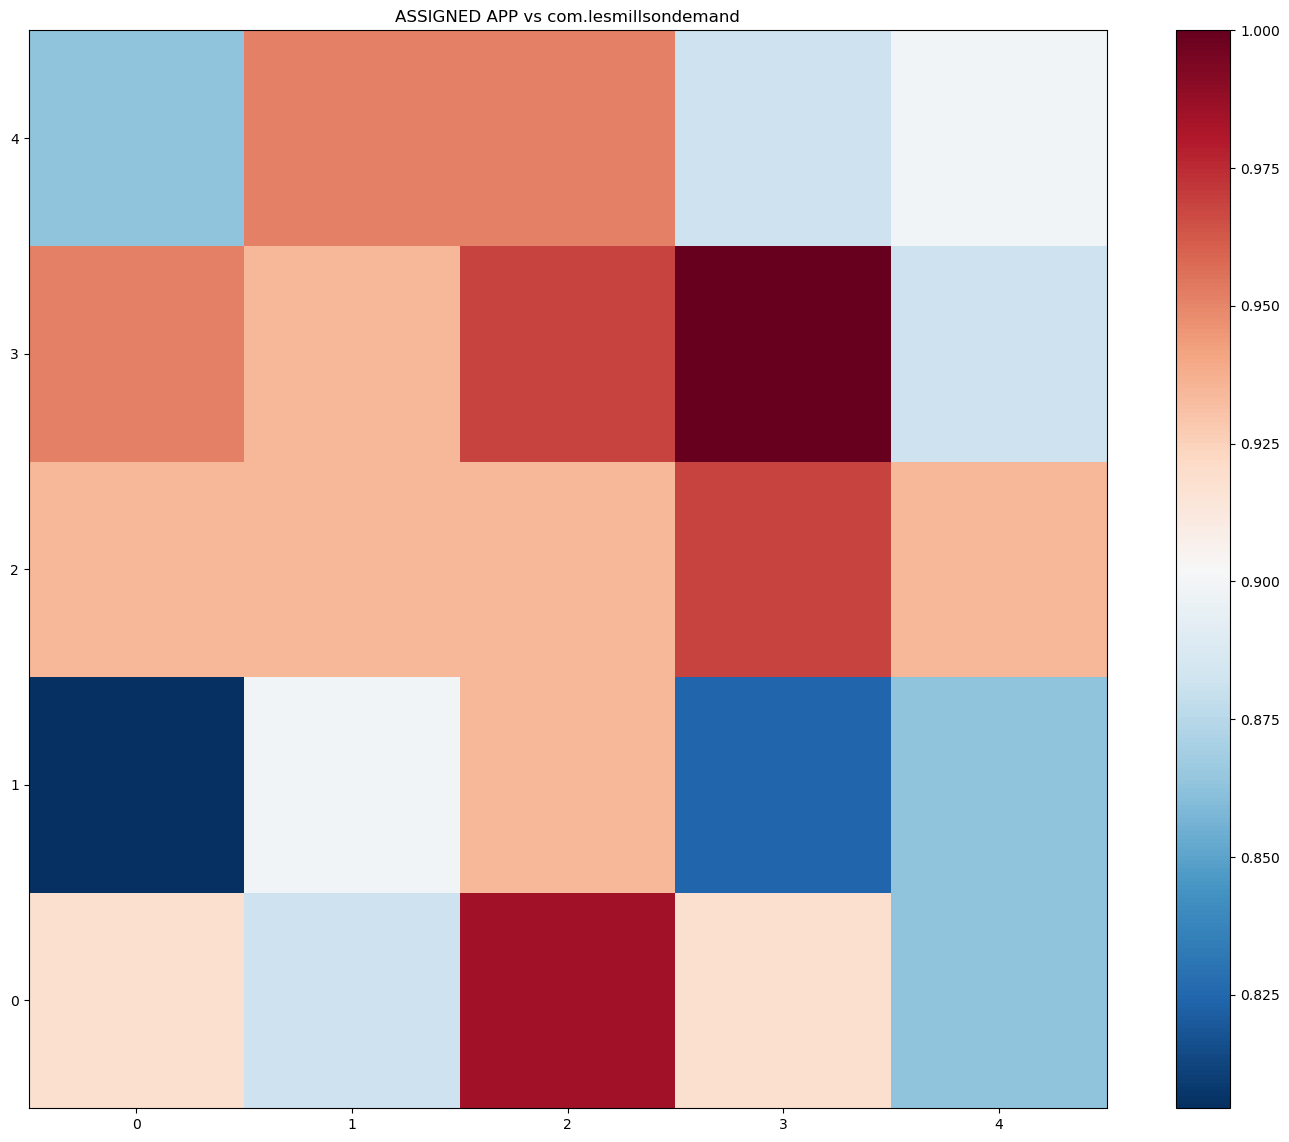

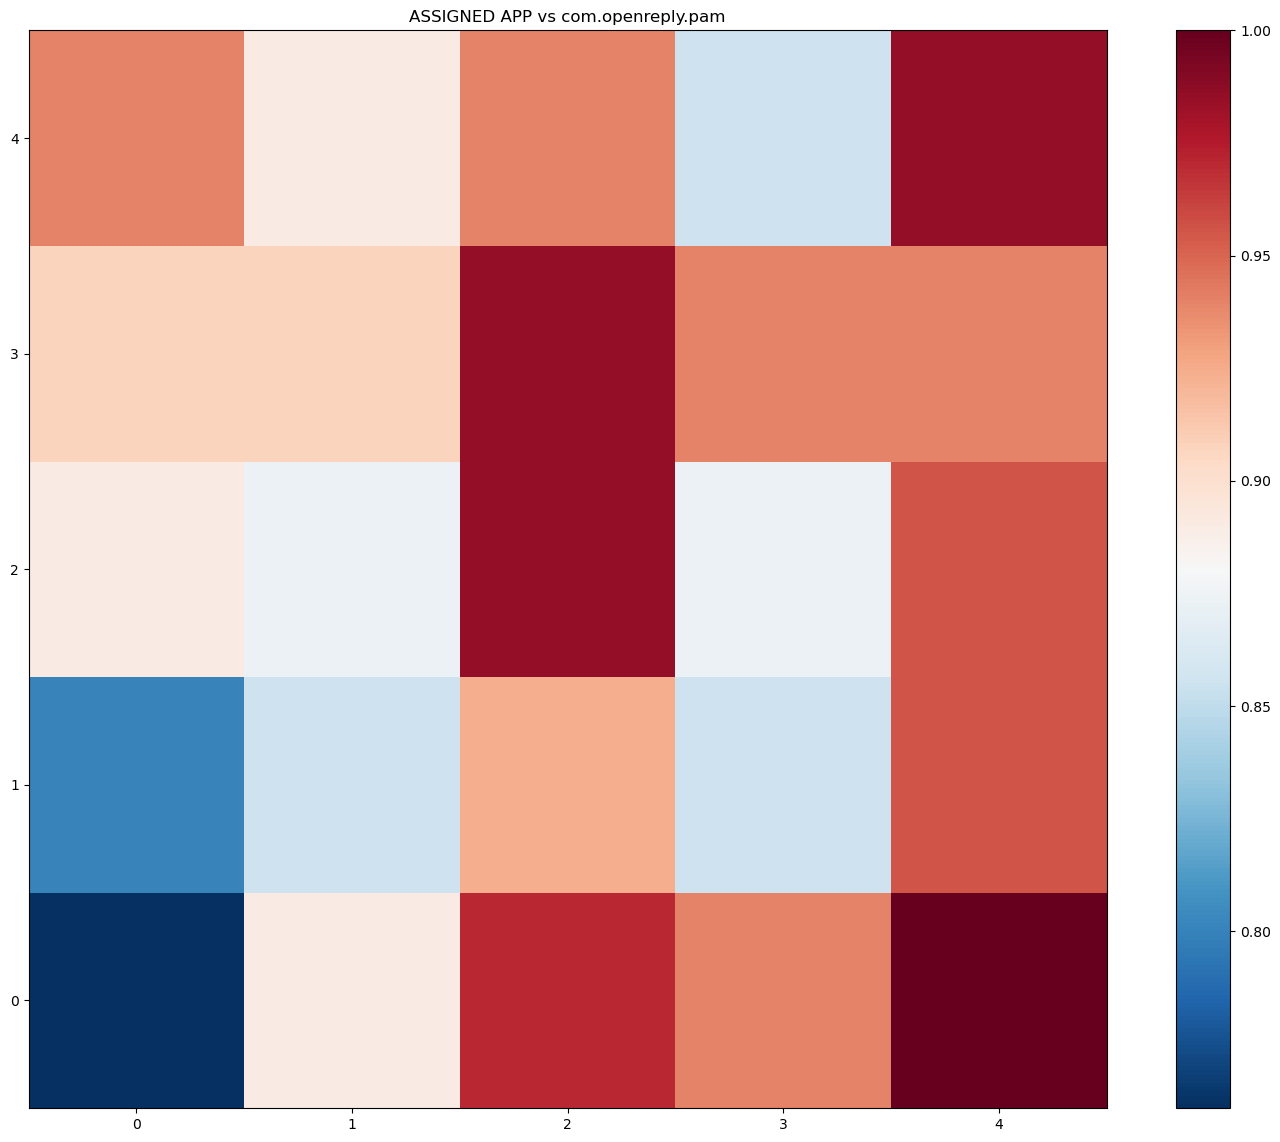

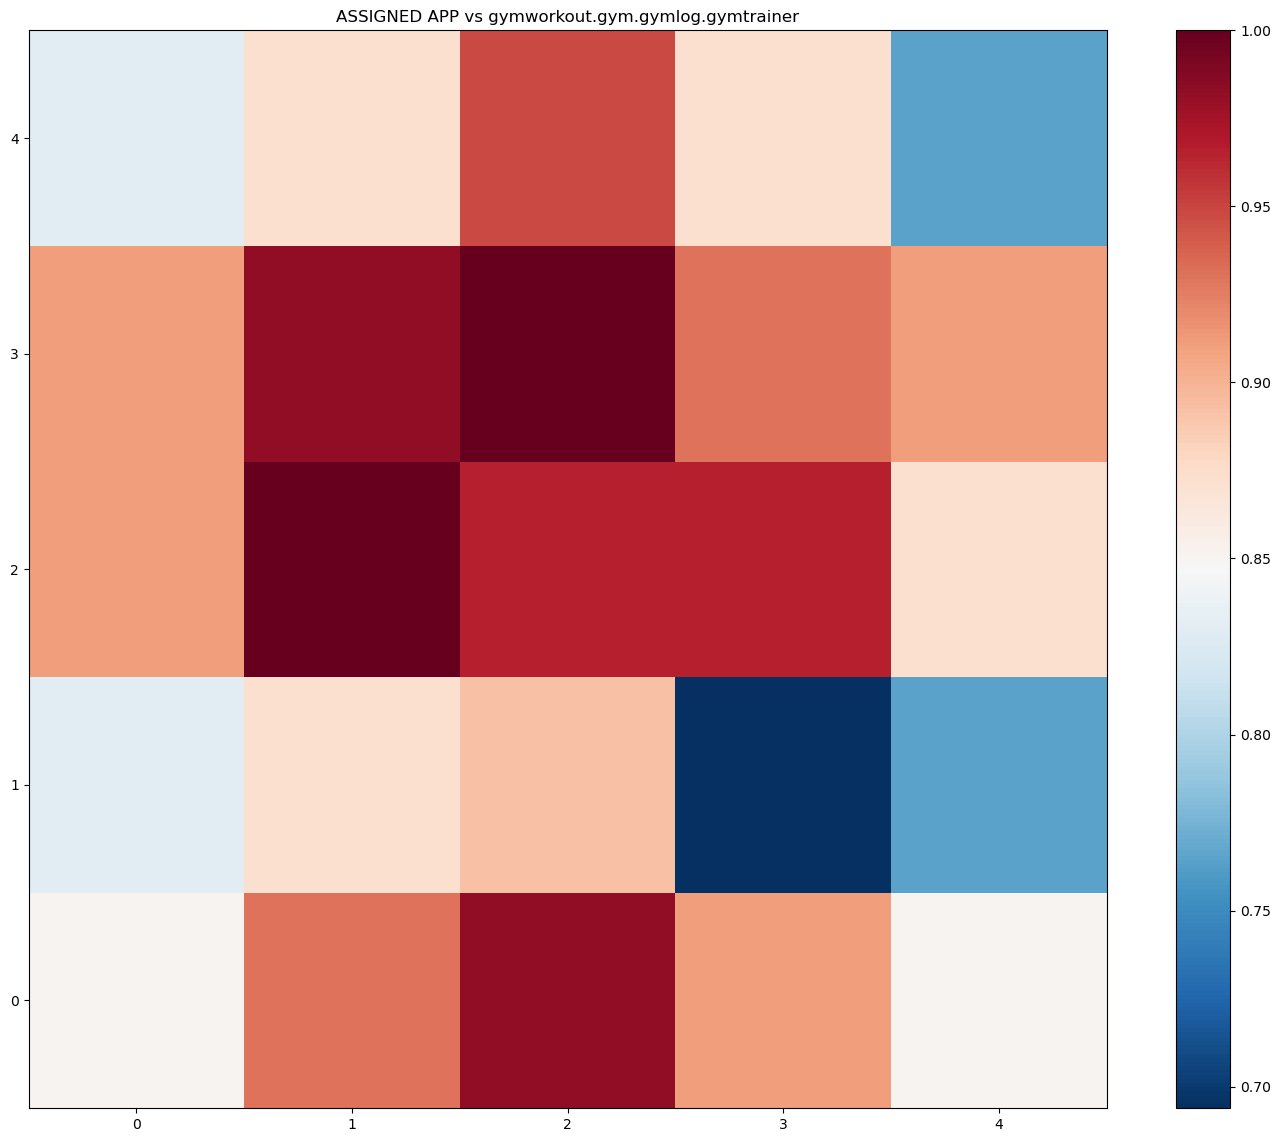

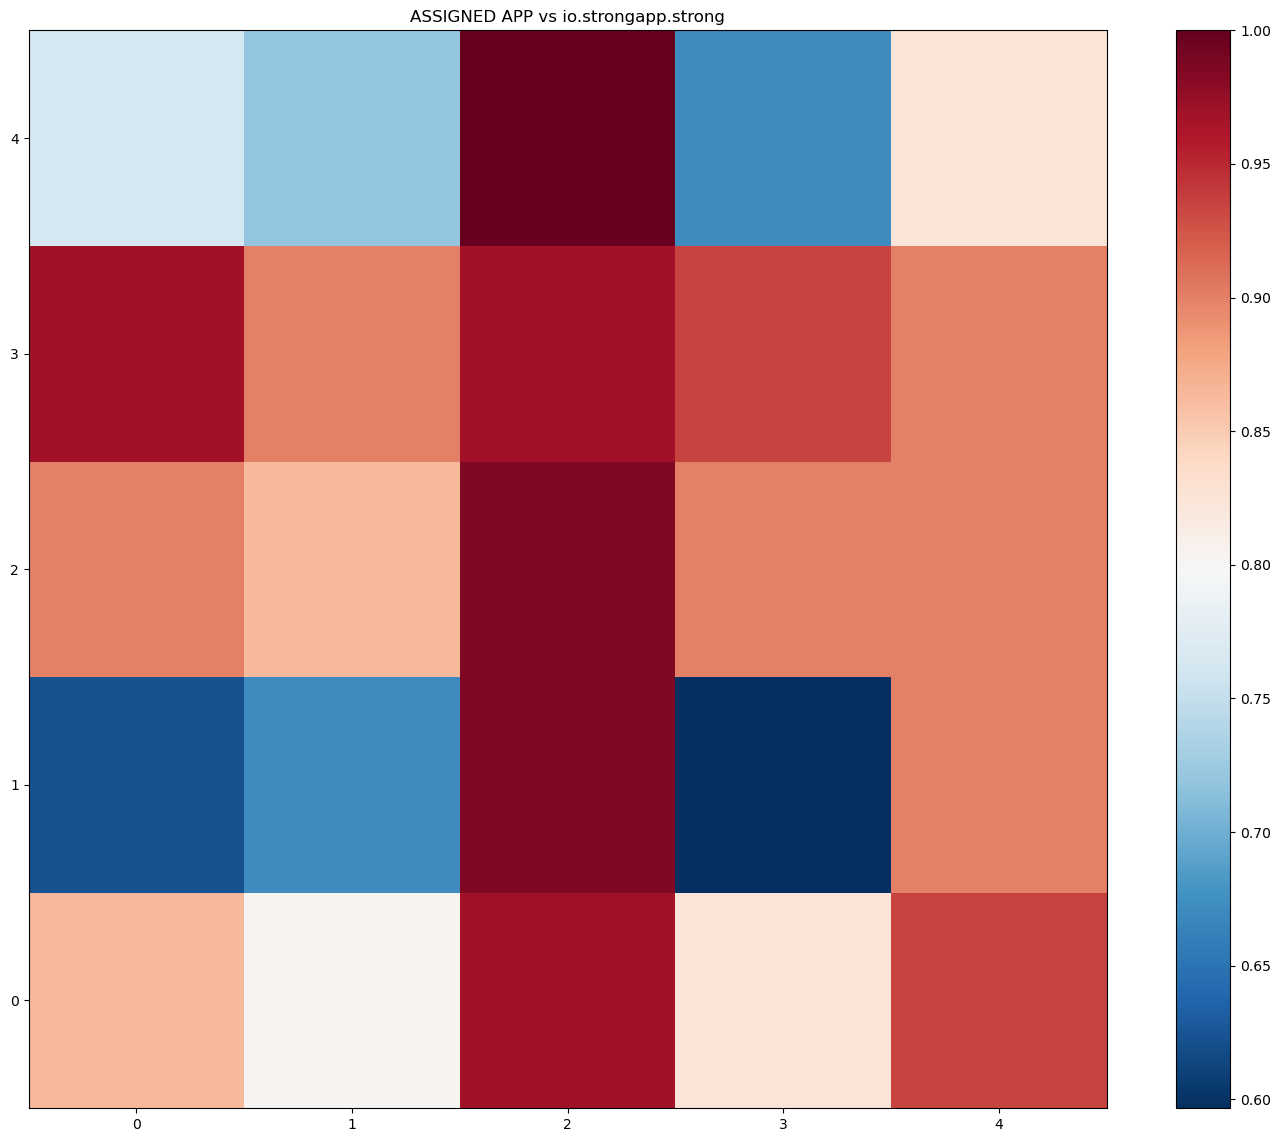

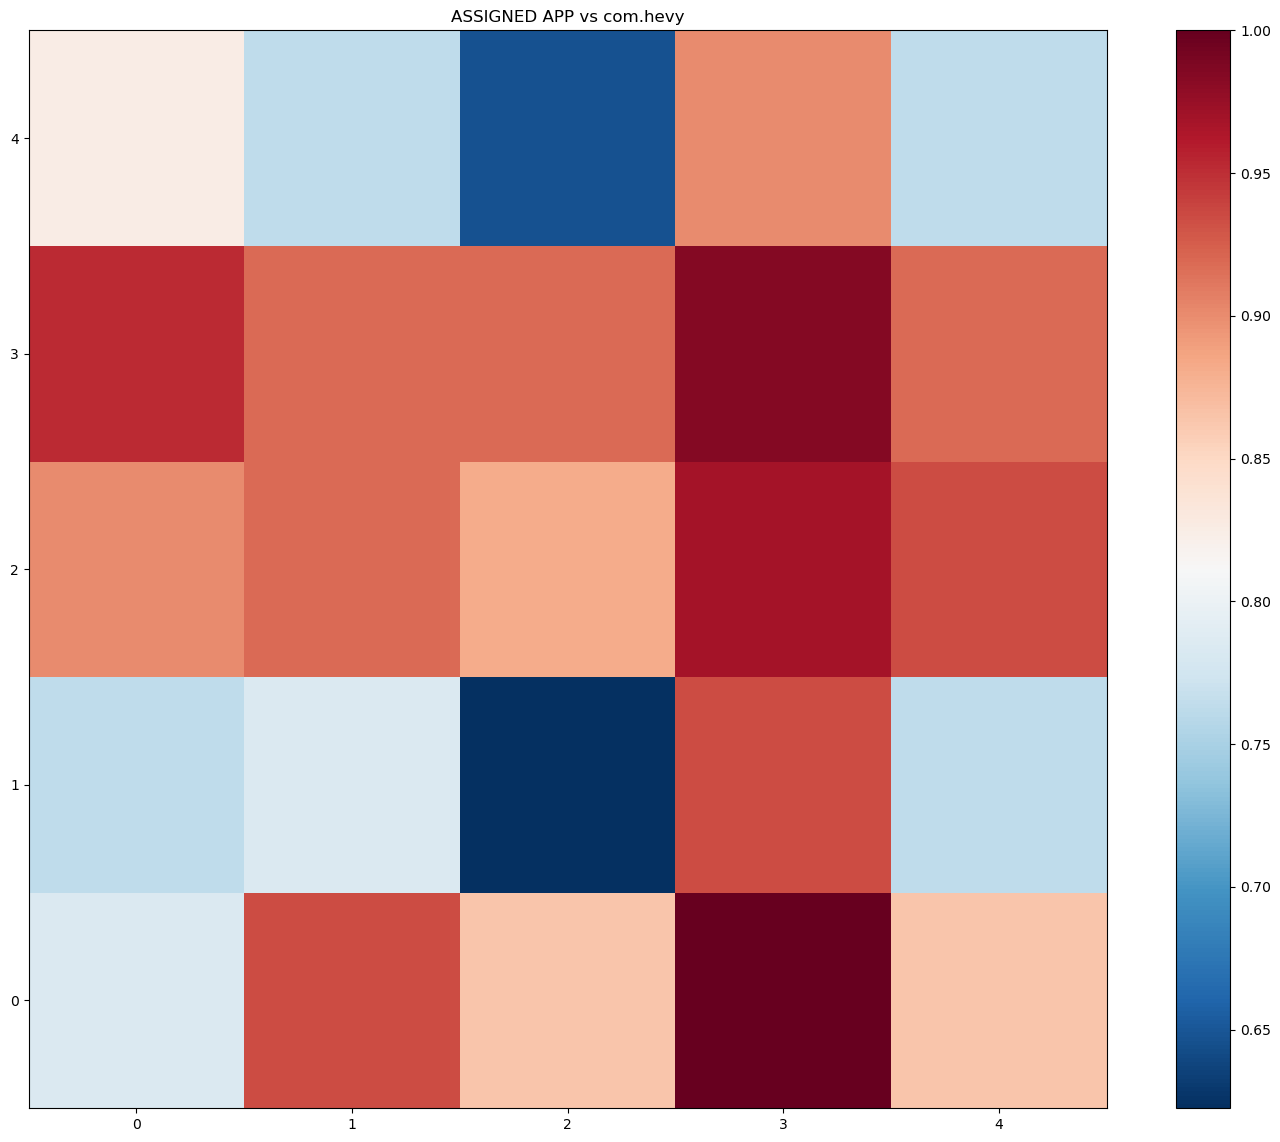

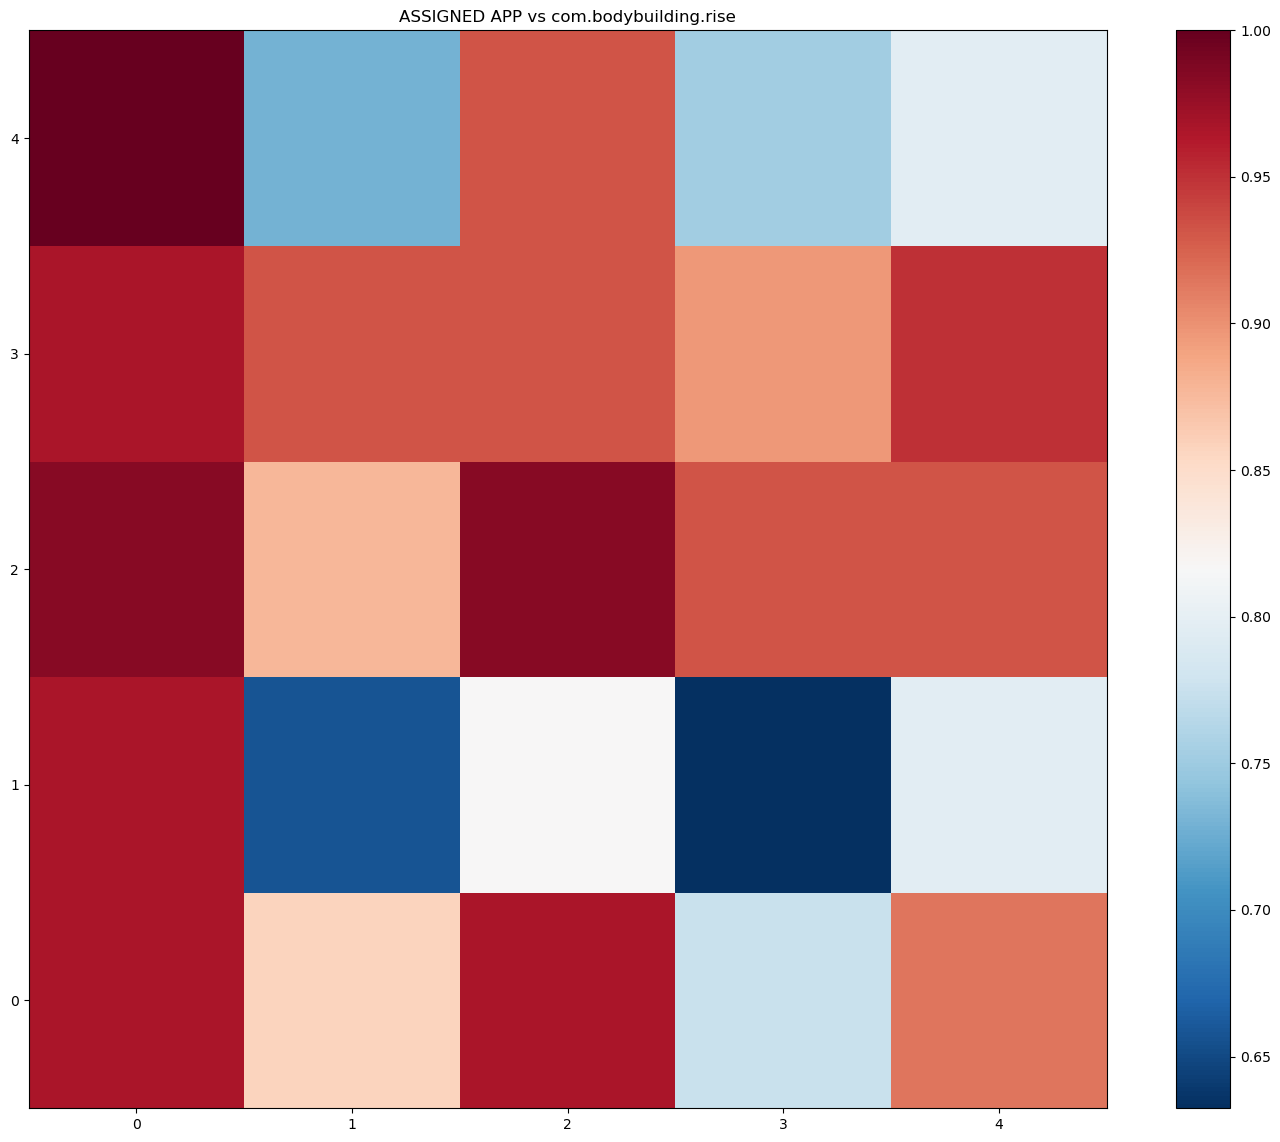

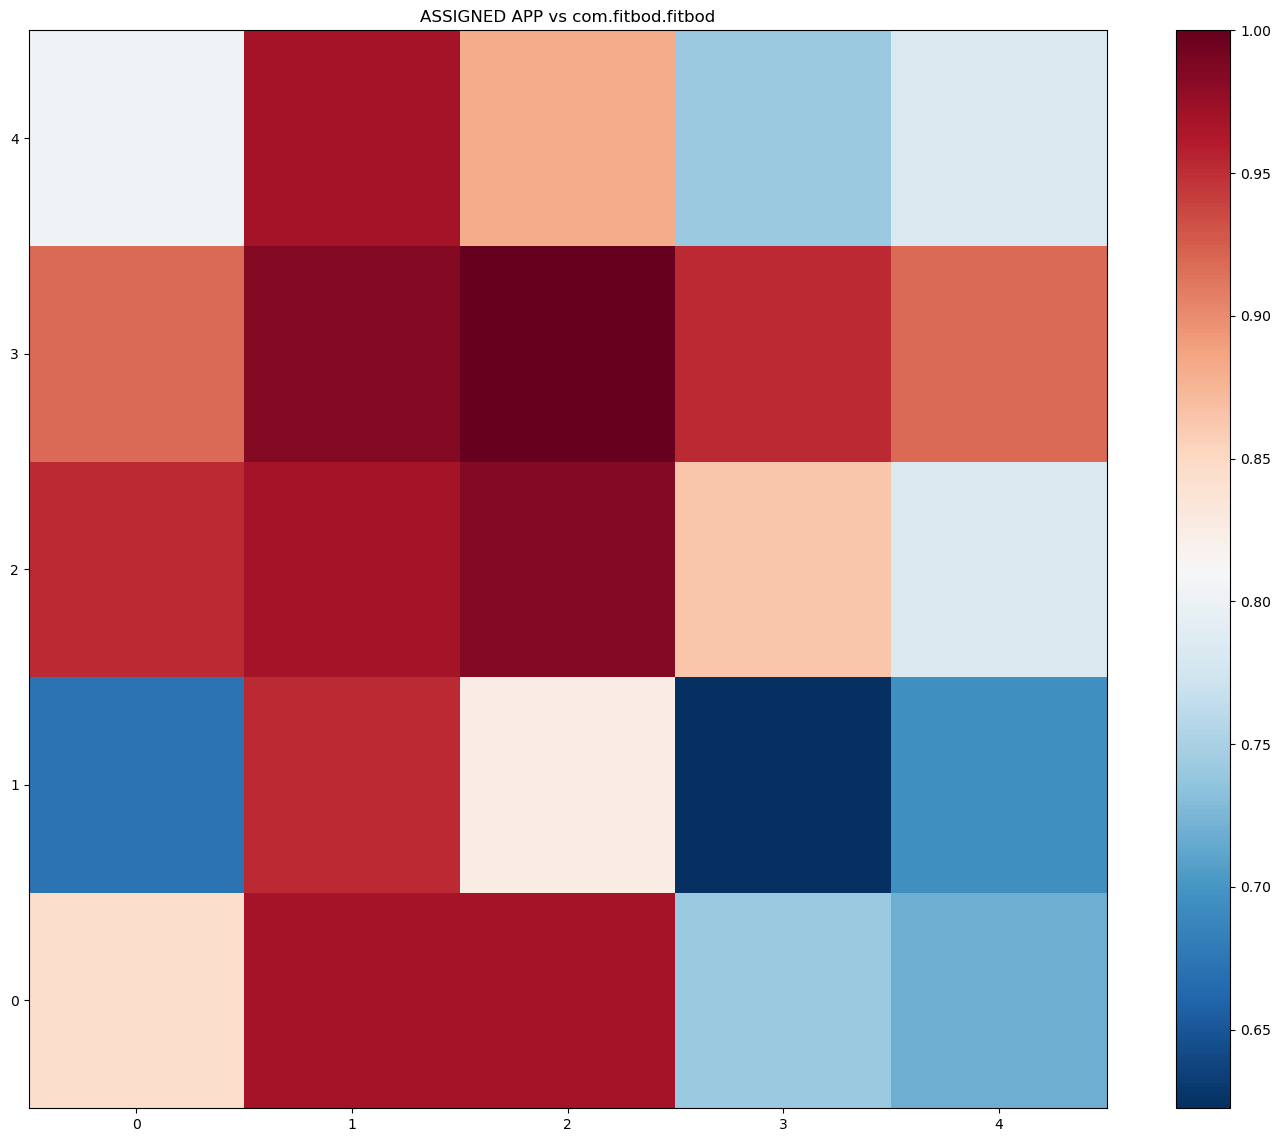

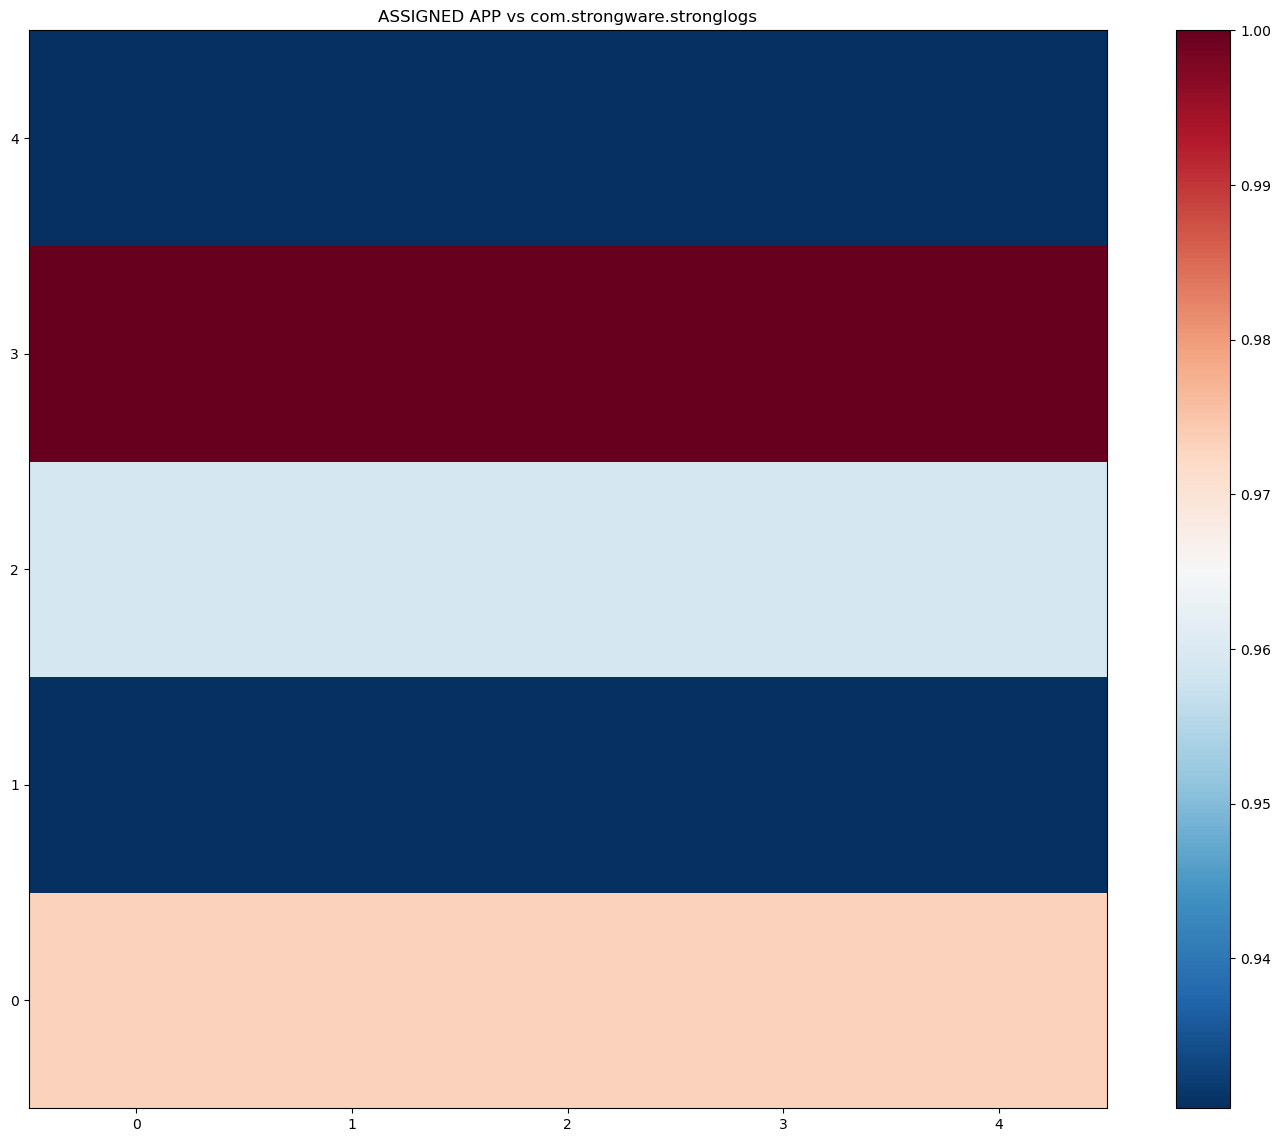

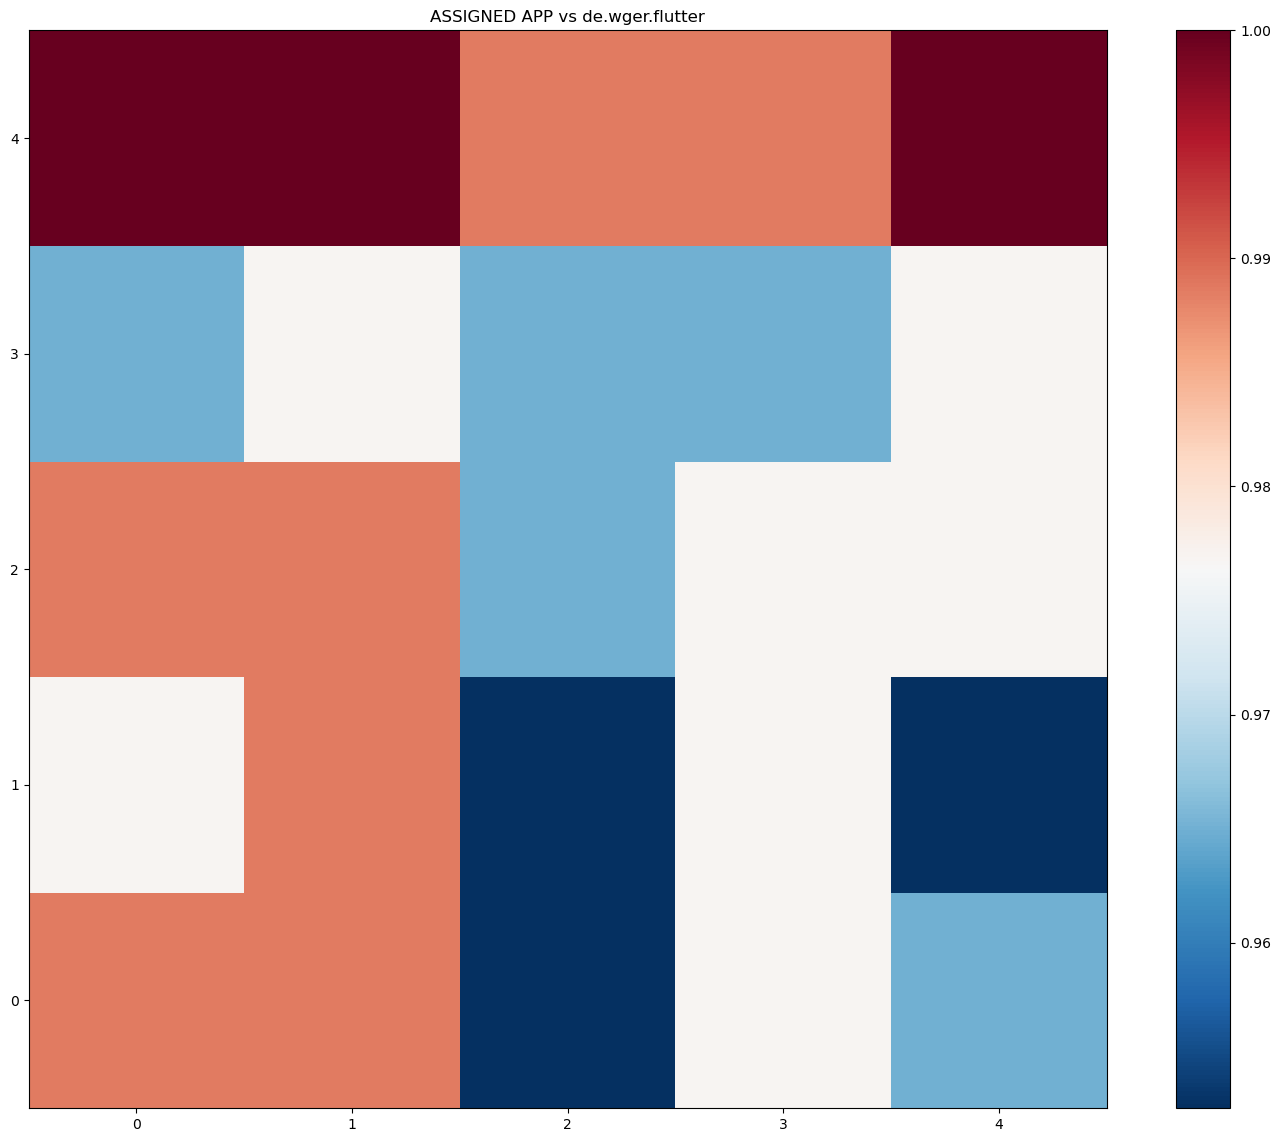

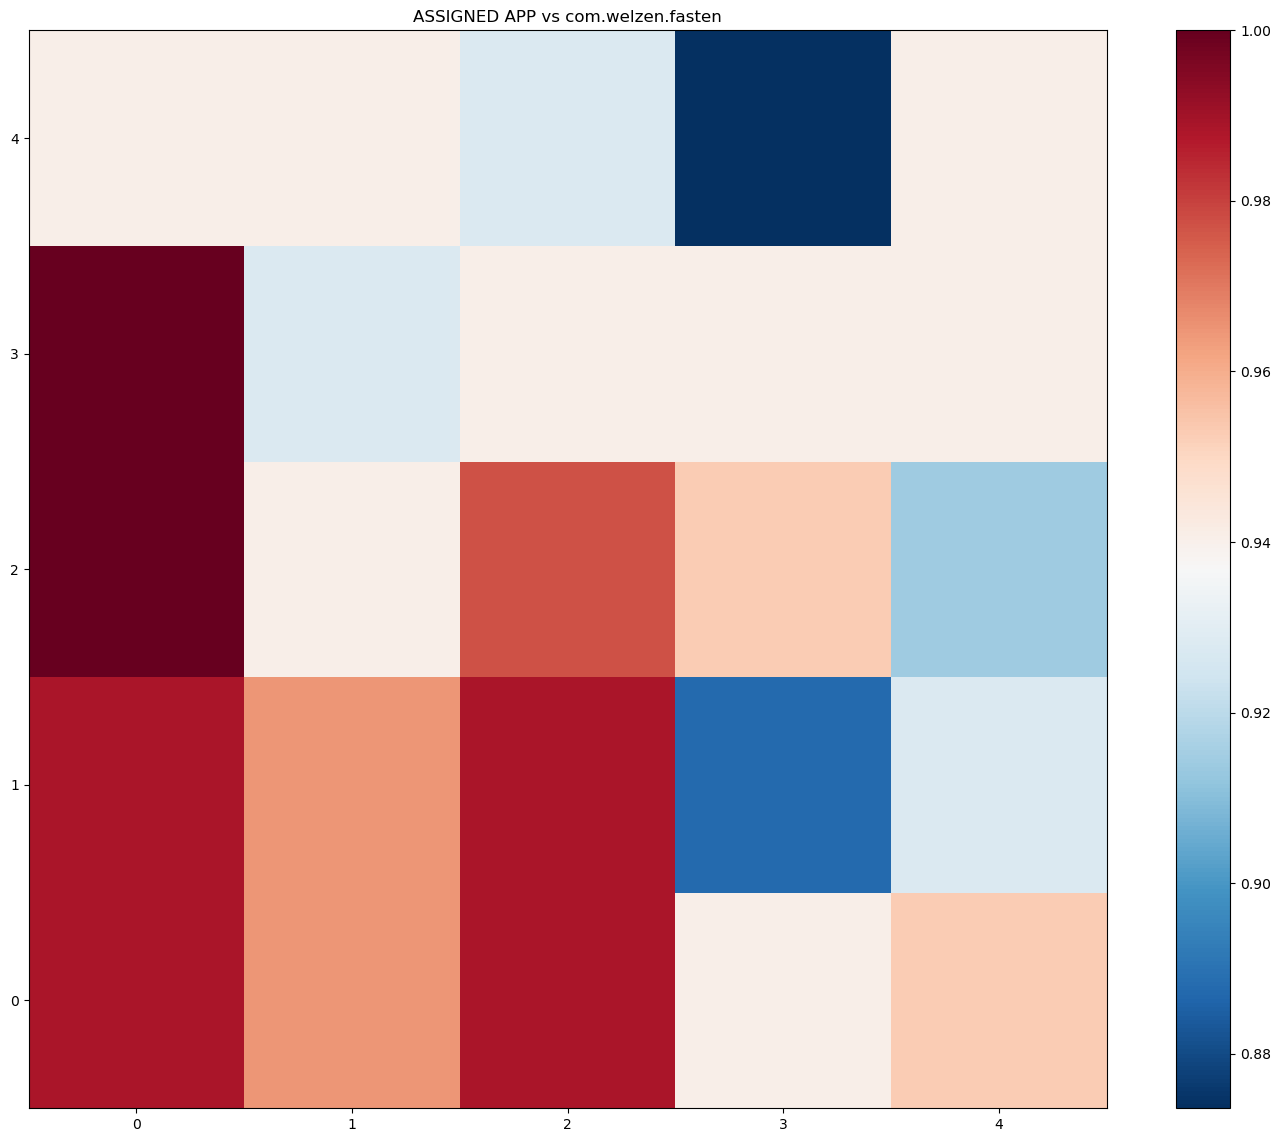

In [69]:
package_arr = {"com.bodybuilding.rise", "com.fitbod.fitbod", "com.hevy", "com.lesmillsondemand",
               "com.openreply.pam","com.strongware.stronglogs", "com.welzen.fasten", "de.wger.flutter", 
               "gymworkout.gym.gymlog.gymtrainer", "io.strongapp.strong"}

#LDA FOR ASSIGNED APP

og_data = read_csv("PreProcessedReview_com.fitness22.workout.csv")
dataset = [str(txt).split() for txt in og_data['Review']]  # convert a documents to list of tokens

dictionary = Dictionary(documents=dataset, prune_at=None)
dictionary.compactify()

main_dataset = [dictionary.doc2bow(doc) for doc in dataset]  # convert list of tokens to bag of word representation
lda_main = LdaMulticore(corpus=main_dataset, num_topics=5, id2word=dictionary, workers=4, eval_every=None, passes=10, batch=True,
)
    
# LDA FOR ALL OTHER APPS

for key in package_arr:
    competitor_similar_data = read_csv("PreProcessedReview_"+key+".csv")
    dataset = [str(txt).split() for txt in competitor_similar_data['Review']]  # convert a documents to list of tokens

    dictionary = Dictionary(documents=dataset, prune_at=None)
      # use Dictionary to remove un-relevant tokens
    dictionary.compactify()

    curr_dataset = [dictionary.doc2bow(doc) for doc in dataset]  # convert list of tokens to bag of word representation
    lda_curr = LdaMulticore(corpus=curr_dataset, num_topics=5, id2word=dictionary, workers=4, eval_every=None, passes=10, batch=True,)
    mdiff, annotation = lda_main.diff(lda_curr, distance='jaccard', num_words=50)
    plot_difference(mdiff, title="ASSIGNED APP vs "+ str(key), annotation=annotation)

Explanation of the plot and comparison:

From the plot above, we can see the similar and different topics between the two models (one is the assigned app and the other is one of the similar/ competitor app). The app (package) being compared with the assigned app is mentioned in the title of each graph. The plot also includes relevant tokens describing the topics’ intersection and difference. Topics 0 to 1 are plotted in the x and y axis. The map legend on the right hand side shows that a maroon square indicates high Jaccard similarity, whereas dard blue indicates low similarity between 2 topics from 2 different apps. 

#### BONUS for TASK 4: FINDING THE DOMINANT TOPIC FOR EACH REVIEW

In [133]:
df = read_csv("PreProcessedReview_com.fitness22.workout.csv", error_bad_lines=False)
df = df.dropna(subset=["Review"])

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,
# minimum reqd occurences of a word 
                             stop_words='english',             
# remove stop words
                             lowercase=True,                   
# convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  
# num chars > 3
                             )
data_arr = df["Review"].tolist()
data_vectorized = vectorizer.fit_transform(data_arr)

# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=10,               # Number of topics
                                      max_iter=1,               
# Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          
# Random state
                                      batch_size=128,            
# n docs in each learning iter
                                      evaluate_every = -1,       
# compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               
# Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

# Create Document — Topic Matrix
lda_output = lda_model.transform(data_vectorized)
# column names
topicnames = ["Topic " + str(i) for i in range(best_lda_model.n_components)]
# index names
docnames = ["Review " + str(i) for i in range(len(data))]
# Make the pandas dataframe
df_document_topic = DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic
# Styling
def color_green(val):
 color = 'green' if val > .1 else 'black'
 return 'color: {col}'.format(col=color)
def make_bold(val):
 weight = 700 if val > .1 else 400
 return 'font-weight: {weight}'.format(weight=weight)
# Apply Style
df_document_topics = df_document_topic.head(100).style.applymap(color_green).applymap(make_bold)

display(df_document_topics)

C:\Users\Anika\AppData\Local\Temp\ipykernel_13272\1283319663.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = read_csv("PreProcessedReview_com.fitness22.workout.csv", error_bad_lines=False)


,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,dominant_topic
Review 0,0.020000,0.200000,0.180000,0.500000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,3
Review 1,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.550000,9
Review 2,0.030000,0.030000,0.030000,0.370000,0.030000,0.370000,0.030000,0.030000,0.030000,0.030000,3
Review 3,0.050000,0.050000,0.050000,0.050000,0.550000,0.050000,0.050000,0.050000,0.050000,0.050000,4
Review 4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.880000,0.050000,0.040000,7
Review 5,0.010000,0.010000,0.010000,0.010000,0.360000,0.120000,0.010000,0.010000,0.010000,0.420000,9
Review 6,0.020000,0.340000,0.020000,0.020000,0.020000,0.020000,0.360000,0.180000,0.020000,0.020000,6
Review 7,0.010000,0.010000,0.090000,0.530000,0.010000,0.010000,0.010000,0.330000,0.010000,0.010000,3
Review 8,0.030000,0.860000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,0.000000,0.000000,1
Review 9,0.010000,0.010000,0.010000,0.080000,0.090000,0.010000,0.700000,0.010000,0.080000,0.010000,6


### Task 5: RECOMMENDATION

Feature 1: Add custom notes or exercises

After reading through the user reviews, one of the common feedbacks was the limited number of workouts. Users frequently mentioned that being able to write notes would earn a 5 star rating from them. The app guarantees satisfaction for all levels of heath enthusiasts starting from beginner, intermediate and advaced. Intermediate and advanced users like to incorporate new versions of workouts and will benefit from not having to rely on default excercises only. 
On the other hand, beginner users will benefit from writing notes on their workouts/ sets. This feature will help to retain existing users. 

Feature 2: Follow other users and share progress/ routine

Out of the 10 similar and competitor apps, 4 of them have some form of progress sharing or user community aspect. After analysing the Google play page, I found out that the app does not have any feature that allows user community interaction. In addition, several user reviews on Google Play suggests that the app was not interesting for them anymore. Having the progress sharing feature will not only promote healthy/ beneficial competition but will also keep users more engaged with the platform. 
This feature will draw new users to the flatform. 

References:

https://stackoverflow.com/questions/28819272/python-how-to-calculate-the-cosine-similarity-of-two-word-lists

https://radimrehurek.com/gensim/auto_examples/howtos/run_compare_lda.html

https://www.analyticsvidhya.com/blog/2021/07/topic-modelling-with-lda-a-hands-on-introduction/

https://www.analyticsvidhya.com/blog/2021/10/sentiment-analysis-with-textblob-and-vader/#:~:text=As%20TextBlob%20is%20a%20Lexicon,Rule%2Dbased%20sentiment%20analyzers%E2%80%9D.

https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24

https://yanlinc.medium.com/how-to-build-a-lda-topic-model-using-from-text-601cdcbfd3a6